In [ ]:
# --- Setup (run once) ---
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

RANDOM_STATE = 42

# Project base folders (this notebook is in mini project 1/notebooks/)
BASE_DIR = Path("..")
DATA_DIR = BASE_DIR / "data"
OUT_CM = BASE_DIR / "outputs" / "confusion_matrix"
OUT_VIZ = BASE_DIR / "outputs" / "data_visualization"
OUT_CM.mkdir(parents=True, exist_ok=True)
OUT_VIZ.mkdir(parents=True, exist_ok=True)

# === Update this filename if yours is different ===
CSV_FILE = DATA_DIR / "stroop_test_data.csv"

# Load CSV
df = pd.read_csv(CSV_FILE)

# Ensure at least 16 samples
assert len(df) >= 16, f"Need at least 16 samples, found {len(df)}"

# Keep numeric features only
X_raw = df.select_dtypes(include=[np.number]).copy()

# Handle missing values (median)
imputer = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(imputer.fit_transform(X_raw), columns=X_raw.columns)

# Standardize for SVM (and PCA plot)
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_imp), columns=X_imp.columns)

print("Shape:", X_std.shape)
X_std.head(20)


NameError: name 'X' is not defined

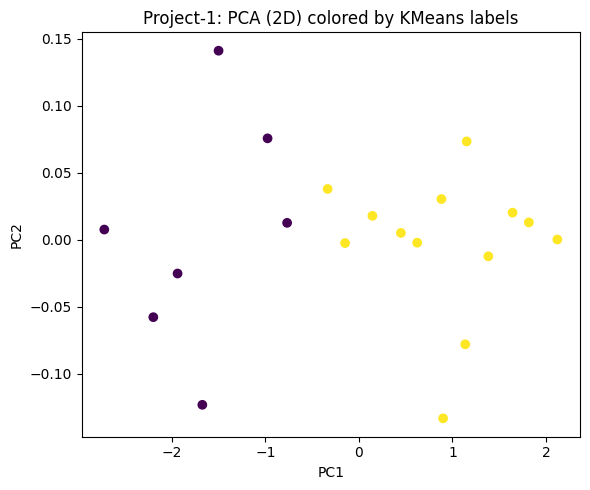

,kmeans_label
0,1
1,1
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [10]:
# KMeans to create labels
kmeans = KMeans(n_clusters=2, n_init=10, random_state=RANDOM_STATE)
y_km = kmeans.fit_predict(X_std)
df["kmeans_label"] = y_km

# 2D PCA plot for visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
Z = pca.fit_transform(X_std)
plt.figure(figsize=(6,5))
plt.scatter(Z[:,0], Z[:,1], c=y_km)
plt.title("Project-1: PCA (2D) colored by KMeans labels")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.tight_layout()
plt.savefig(OUT_VIZ / "p1_pca_kmeans.png", dpi=200)
plt.show()

df[["kmeans_label"]].head(20)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, df["kmeans_label"], test_size=0.3, random_state=RANDOM_STATE, stratify=df["kmeans_label"]
)
len(X_train), len(X_test)


(14, 6)

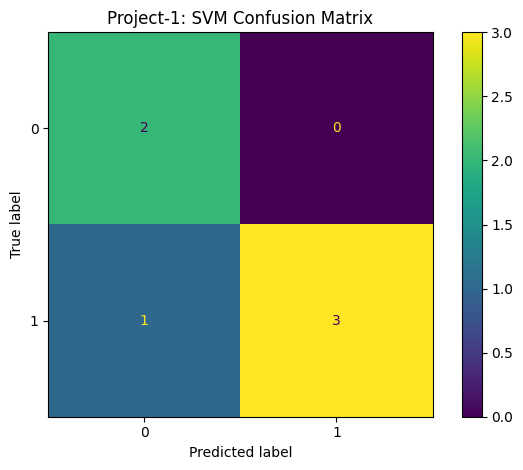

In [12]:
svm = SVC(kernel="rbf", probability=False, random_state=RANDOM_STATE)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(cm_svm)
disp.plot()
plt.title("Project-1: SVM Confusion Matrix")
plt.tight_layout()
plt.savefig(OUT_CM / "p1_svm_cm.png", dpi=200)
plt.show()


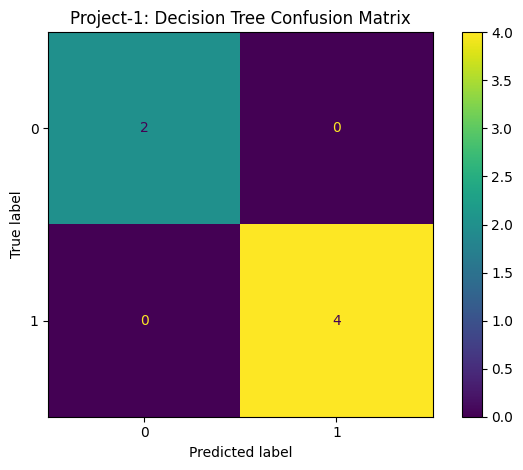

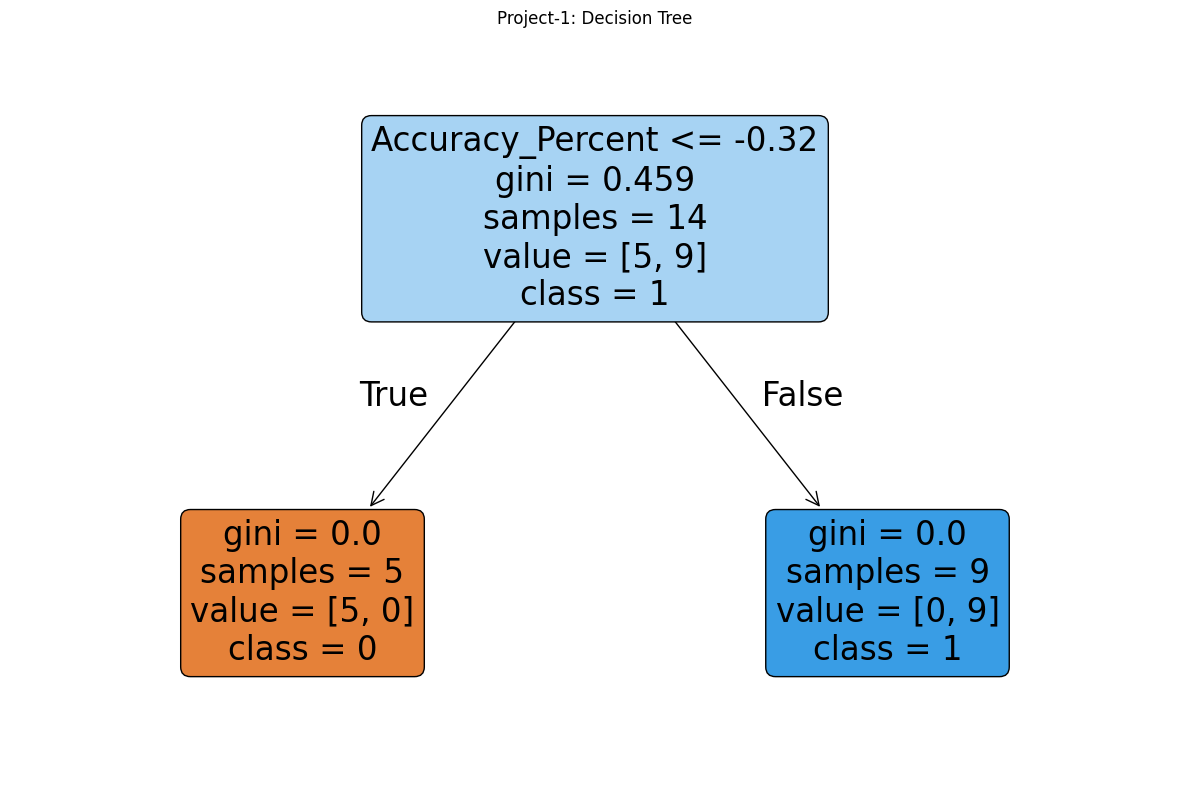

In [13]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=None)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm_dt)
disp.plot()
plt.title("Project-1: Decision Tree Confusion Matrix")
plt.tight_layout()
plt.savefig(OUT_CM / "p1_decision_tree_cm.png", dpi=200)
plt.show()

# Draw the tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X_std.columns, class_names=["0","1"], filled=True, rounded=True)
plt.title("Project-1: Decision Tree")
plt.tight_layout()
plt.savefig(OUT_VIZ / "p1_decision_tree.png", dpi=200)
plt.show()
